In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

### Visualizations 

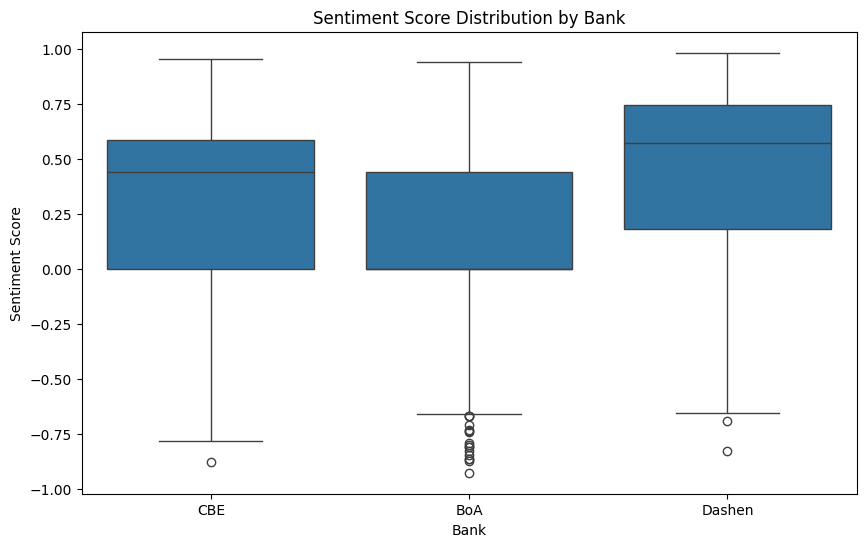

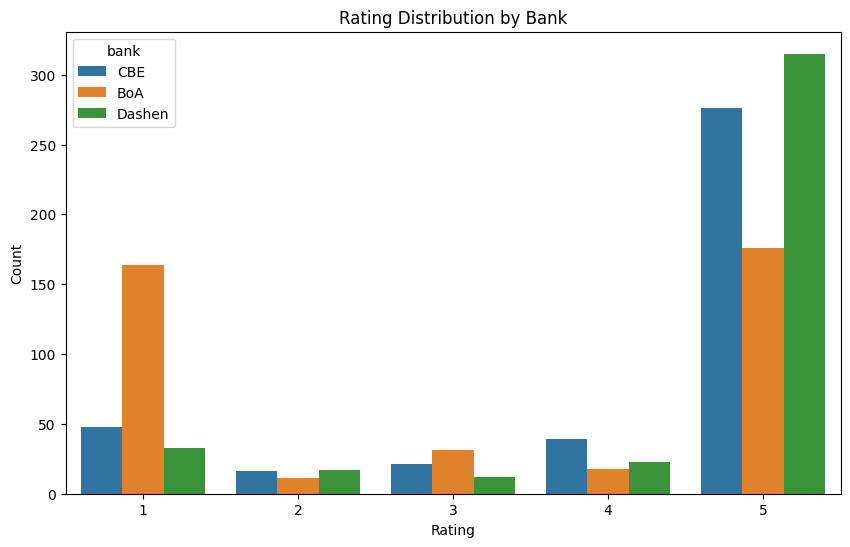

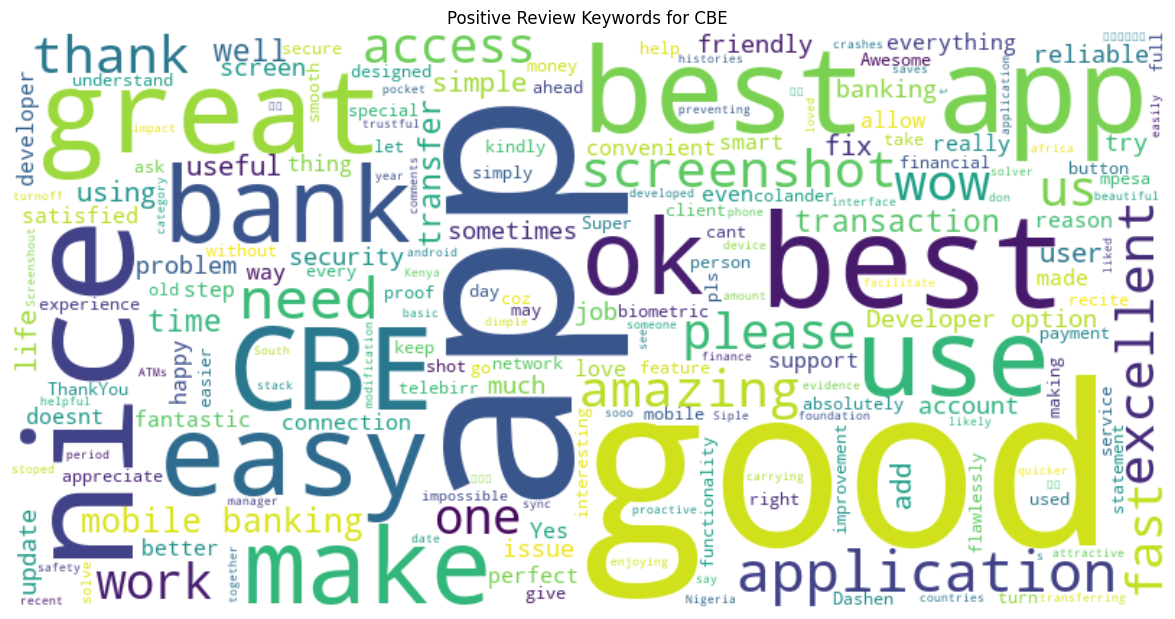

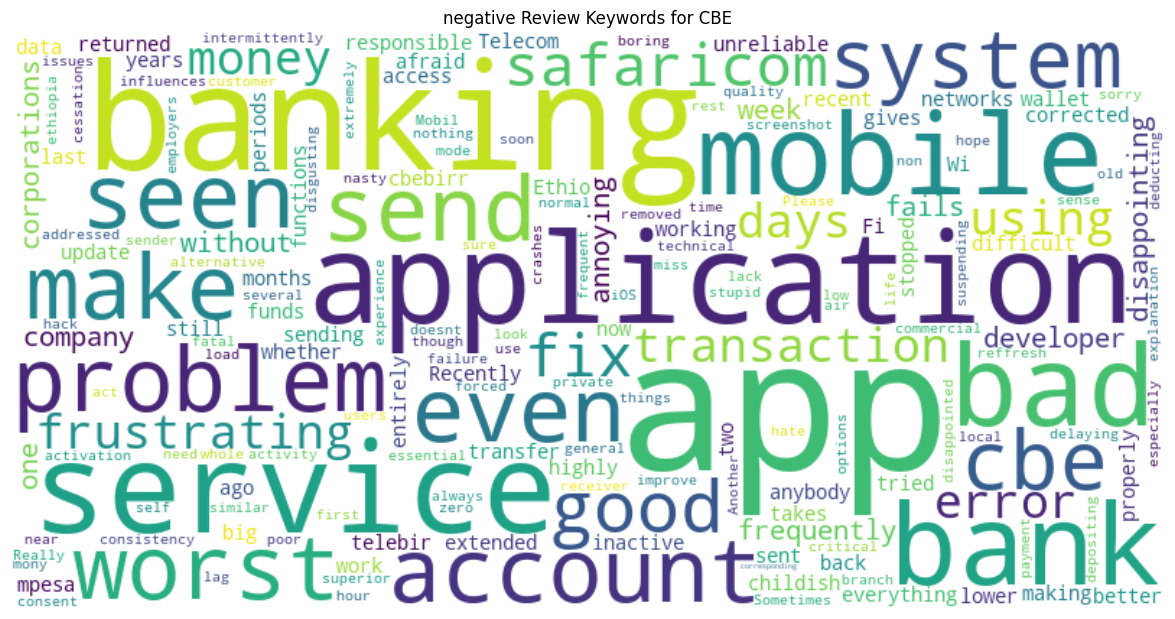

In [44]:


# Load your cleaned review data
df = pd.read_csv('../data/vader_sentiment_reviews.csv')

# Example: Sentiment score distribution by bank
plt.figure(figsize=(10,6))
sns.boxplot(x='bank', y='sentiment_score', data=df)
plt.title('Sentiment Score Distribution by Bank')
plt.ylabel('Sentiment Score')
plt.xlabel('Bank')
plt.show()

# Example: Ratings distribution per bank
plt.figure(figsize=(10,6))
sns.countplot(x='rating', hue='bank', data=df)
plt.title('Rating Distribution by Bank')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Word cloud for positive reviews of CBE
positive_reviews = ' '.join(df[(df['bank']=='CBE') & (df['sentiment_label']=='positive')]['review'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_reviews)
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Review Keywords for CBE')
plt.show()
# Word cloud for negetive reviews of CBE
positive_reviews = ' '.join(df[(df['bank']=='CBE') & (df['sentiment_label']=='negative')]['review'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_reviews)
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('negative Review Keywords for CBE')
plt.show()


 ### Drivers & Pain Points

In [45]:
def analyze_keywords(bank_name):
    bank_df = df[df['bank'] == bank_name]
    pos_keywords = bank_df[bank_df['sentiment_label'] == 'positive']['processed_review'].str.cat(sep=' ')
    neg_keywords = bank_df[bank_df['sentiment_label'] == 'negative']['processed_review'].str.cat(sep=' ')
    return {
        'Top Drivers': dict(pd.Series(pos_keywords.split()).value_counts().head(10)),
        'Pain Points': dict(pd.Series(neg_keywords.split()).value_counts().head(10))
    }

In [50]:
cbe_insights = analyze_keywords('CBE')
boa_insights = analyze_keywords('BoA')

In [51]:
cbe_insights['Top Drivers']

{'app': np.int64(99),
 'good': np.int64(84),
 'best': np.int64(37),
 'nice': np.int64(27),
 'like': np.int64(19),
 'cbe': np.int64(16),
 'great': np.int64(16),
 'easy': np.int64(15),
 'use': np.int64(14),
 'make': np.int64(13)}

In [53]:
cbe_insights['Pain Points']

{'app': np.int64(11),
 'banking': np.int64(6),
 'service': np.int64(5),
 'application': np.int64(5),
 'mobile': np.int64(4),
 'bad': np.int64(4),
 'bank': np.int64(4),
 'seen': np.int64(3),
 'make': np.int64(3),
 'send': np.int64(3)}

In [54]:
boa_insights['Top Drivers']

{'app': np.int64(62),
 'good': np.int64(54),
 'best': np.int64(24),
 'bank': np.int64(22),
 'please': np.int64(22),
 'use': np.int64(14),
 'boa': np.int64(13),
 'nice': np.int64(13),
 'better': np.int64(12),
 'banking': np.int64(12)}

In [55]:
boa_insights['Pain Points']

{'app': np.int64(65),
 'work': np.int64(18),
 'time': np.int64(17),
 'worst': np.int64(17),
 'bank': np.int64(15),
 'ever': np.int64(11),
 'even': np.int64(10),
 'fix': np.int64(10),
 'boa': np.int64(9),
 'bad': np.int64(8)}